In [1]:
# python env req:
# conda install -c conda-forge rubin-scheduler
# git clone ts_fbs_utils
# pip install -e . ts_fbs_utils --no-deps 
# git clone ts_config_ocs 
# find fbs_config_image_photocal_survey.py in ts_config_ocs/Scheduler/feature_scheduler/auxtel 

import os
import warnings
import copy
import pickle
import json
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
from cycler import cycler
import colorcet as cc

import pandas as pd

import datetime
from astropy.coordinates import SkyCoord, Angle
from astropy.time import Time, TimeDelta
import astropy.units as u
import astropy
astropy.utils.iers.conf.iers_degraded_accuracy = 'ignore'

from rubin_scheduler.scheduler import sim_runner
from rubin_scheduler.site_models import Almanac
from rubin_scheduler.utils import Site
from rubin_scheduler.scheduler.example import get_ideal_model_observatory

#from rubin_scheduler.scheduler.utils import SchemaConverter
#from schedview import plot

# Import the actually run config script from ts_config_ocs
# (run in directory containing a copy of the script)
#from fbs_config_image_photocal_survey import get_scheduler
from jan_2025_fbs_spec_survey import get_scheduler

In [2]:
import rubin_scheduler
rubin_scheduler.__version__, np.__version__

('3.4.1.dev22+g7615c3f.d20250119', '2.2.1')

In [3]:
# What night do you want? 
DAYOBS = '2025-01-22'
day_obs_mjd = int(Time(DAYOBS).mjd)
site = Site('LSST')
almanac = Almanac()
night_events = almanac.get_sunset_info(evening_date=DAYOBS, longitude=site.longitude_rad)
sunset = Time(night_events['sunset'], format='mjd', scale='utc') 
sunrise = Time(night_events['sun_n12_rising'], format='mjd', scale='utc')
survey_length = sunrise.mjd - sunset.mjd
sunset.iso, sunrise.iso, survey_length

('2025-01-22 23:42:14.127',
 '2025-01-23 09:05:20.467',
 np.float64(0.39104561042040586))

In [4]:
# observatory = get_ideal_model_observatory(nside=nside, dayobs = DAYOBS, wind_speed=0, wind_direction=0)
# observatory.observatory.setup_camera(band_changetime=5.0, maxspeed=1.5, shutter_2motion_min_time=0.0)
# observatory.observatory.setup_telescope(altitude_maxspeed=1.5, azimuth_maxspeed=1.5, settle_time=5.0)
# observatory.observatory.setup_dome(azimuth_maxspeed=3.0)

# nside, scheduler = get_scheduler()
# scheduler.survey_lists

In [5]:
start_times = np.arange(sunset, sunset + TimeDelta(2/24., format='jd'), TimeDelta(20*60, format='sec'))
print(len(start_times), start_times[0].iso)
#stop = 60698.03153367
#print(sunset.mjd, stop, (stop-sunset.mjd) * 24)

7 2025-01-22 23:42:14.127


In [6]:
# Set up simulation with scheduler
# Keep this cell together (so regenerate scheduler and observatory if rerun)

rewards = True 
nside = 32

obs_examples = []
for start_time in [start_times[0]]:
    nside, scheduler=get_scheduler()
    scheduler.keep_rewards=rewards
    
    observatory = get_ideal_model_observatory(nside=nside, dayobs = DAYOBS, wind_speed=0, wind_direction=0)
    observatory.observatory.setup_camera(band_changetime=5.0, maxspeed=1.5, shutter_2motion_min_time=0.0)
    observatory.observatory.setup_telescope(altitude_maxspeed=1.5, azimuth_maxspeed=1.5, settle_time=5.0)
    observatory.observatory.setup_dome(azimuth_maxspeed=3.0)
    
    vals = sim_runner(
        observatory,
        scheduler,
        sim_duration=survey_length,
        record_rewards=rewards,
        verbose=True,
    )
    observatory = vals[0]
    scheduler = vals[1]
    observations = vals[2]
    if len(vals) == 5:
        rewards = vals[3]
        obs_rewards = vals[4]
    obs_examples.append(observations)

/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/basis_functions/basis_functions.py:941: FutureWarning: filtername deprecated in favor of bandname
  warnings.warn("filtername deprecated in favor of bandname", FutureWarning)
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/basis_functions/basis_functions.py:1354: FutureWarning: filter_names deprecated in favor of band_names
  warnings.warn("filter_names deprecated in favor of band_names", FutureWarning)
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/skybrightness_pre/sky_model_pre.py:359: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn("Requested MJD between sunrise and sunset, returning closest maps")
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/skybrightness_pre/sky_model_pre.py:359: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn("Requested MJD between sunrise and sunset, returning clos

progress = 10.96%

/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN axis encountered
  survey_df["survey_reward"] = np.nanmax(survey.calc_reward_function(conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:319: RuntimeWarning: All-NaN axis encountered
  rewards[i] = np.nanmax(survey.calc_reward_function(self.conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN axis encountered
  survey_df["survey_reward"] = np.nanmax(survey.calc_reward_function(conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:319: RuntimeWarning: All-NaN axis encountered
  rewards[i] = np.nanmax(survey.calc_reward_function(self.conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN a

progress = 66.65%

/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN axis encountered
  survey_df["survey_reward"] = np.nanmax(survey.calc_reward_function(conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:319: RuntimeWarning: All-NaN axis encountered
  rewards[i] = np.nanmax(survey.calc_reward_function(self.conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN axis encountered
  survey_df["survey_reward"] = np.nanmax(survey.calc_reward_function(conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:319: RuntimeWarning: All-NaN axis encountered
  rewards[i] = np.nanmax(survey.calc_reward_function(self.conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN a

progress = 77.31%

/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN axis encountered
  survey_df["survey_reward"] = np.nanmax(survey.calc_reward_function(conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:319: RuntimeWarning: All-NaN axis encountered
  rewards[i] = np.nanmax(survey.calc_reward_function(self.conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN axis encountered
  survey_df["survey_reward"] = np.nanmax(survey.calc_reward_function(conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:319: RuntimeWarning: All-NaN axis encountered
  rewards[i] = np.nanmax(survey.calc_reward_function(self.conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN a

Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 134 observations
ran in 0 min = 0.0 hours


/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:590: RuntimeWarning: All-NaN axis encountered
  survey_df["survey_reward"] = np.nanmax(survey.calc_reward_function(conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/scheduler/schedulers/core_scheduler.py:319: RuntimeWarning: All-NaN axis encountered
  rewards[i] = np.nanmax(survey.calc_reward_function(self.conditions))
/Users/lynnej/lsst_repos/rubin_scheduler/rubin_scheduler/skybrightness_pre/sky_model_pre.py:359: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn("Requested MJD between sunrise and sunset, returning closest maps")


/var/folders/tr/bjzqy0h17kx31fhndw6050d80000gn/T/ipykernel_76802/4245026854.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  s = survey_rewards_df.loc[index]


(60697.987663503736, 60698.37870911416)

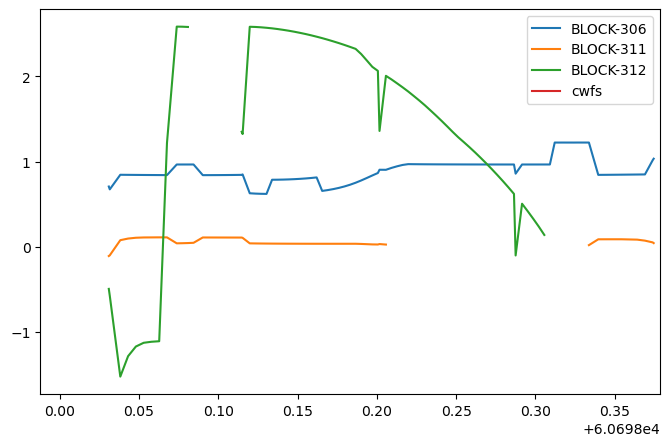

In [7]:
survey_rewards_df = (
        rewards.groupby(["list_index", "survey_index", "queue_start_mjd", "queue_fill_mjd_ns"])
        .agg(
            {
                "tier_label": "first",
                "survey_label": "first",
                "survey_class": "first",
                "survey_reward": "first",
                "feasible": "all",
            }
        )
        .loc[:, ["tier_label", "survey_label", "survey_class", "survey_reward", "feasible"]]
        .reset_index(level=["queue_start_mjd", "queue_fill_mjd_ns"])
        .query(f"floor(queue_start_mjd-0.5)=={day_obs_mjd}")
        .sort_index(ascending=False)
    )
plt.figure(figsize=(8, 5))

for index in survey_rewards_df.index.unique():
    s = survey_rewards_df.loc[index]
    plt.plot(s.queue_start_mjd.values, s.survey_reward.values, label=s['survey_label'].iloc[0])
plt.legend()
plt.xlim(sunset.mjd, sunrise.mjd)

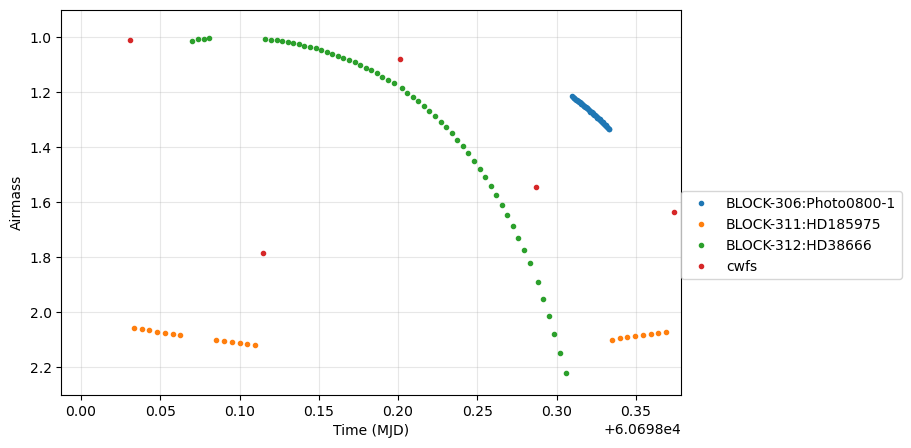

In [8]:
plt.figure(figsize=(8, 5))
for scheduler_note in np.unique(observations['scheduler_note']):
    match = np.where(observations['scheduler_note'] == scheduler_note)
    plt.plot(observations[match]['mjd'], observations[match]['airmass'], marker='.', linestyle='', label=scheduler_note)
plt.xlim(sunset.mjd, sunrise.mjd)
plt.ylim(2.3, 0.9)
plt.legend(loc=(1.0, 0.3))
plt.xlabel("Time (MJD)")
plt.ylabel("Airmass")
plt.grid(alpha=0.3)

/var/folders/tr/bjzqy0h17kx31fhndw6050d80000gn/T/ipykernel_76501/4245026854.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  s = survey_rewards_df.loc[index]


(60697.987663503736, 60698.37870911416)

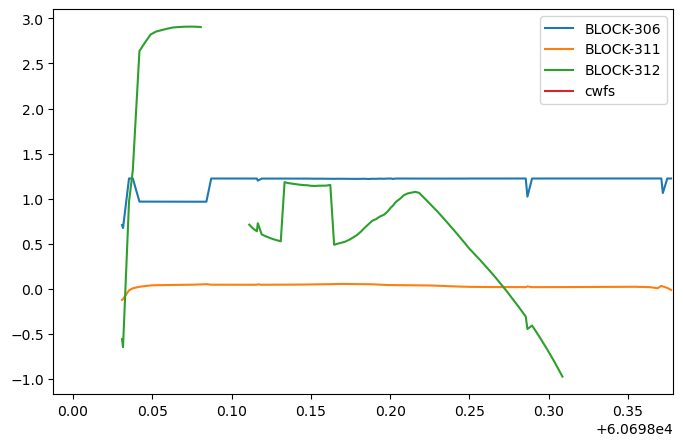

In [7]:
survey_rewards_df = (
        rewards.groupby(["list_index", "survey_index", "queue_start_mjd", "queue_fill_mjd_ns"])
        .agg(
            {
                "tier_label": "first",
                "survey_label": "first",
                "survey_class": "first",
                "survey_reward": "first",
                "feasible": "all",
            }
        )
        .loc[:, ["tier_label", "survey_label", "survey_class", "survey_reward", "feasible"]]
        .reset_index(level=["queue_start_mjd", "queue_fill_mjd_ns"])
        .query(f"floor(queue_start_mjd-0.5)=={day_obs_mjd}")
        .sort_index(ascending=False)
    )
plt.figure(figsize=(8, 5))

for index in survey_rewards_df.index.unique():
    s = survey_rewards_df.loc[index]
    plt.plot(s.queue_start_mjd.values, s.survey_reward.values, label=s['survey_label'].iloc[0])
plt.legend()
plt.xlim(sunset.mjd, sunrise.mjd)

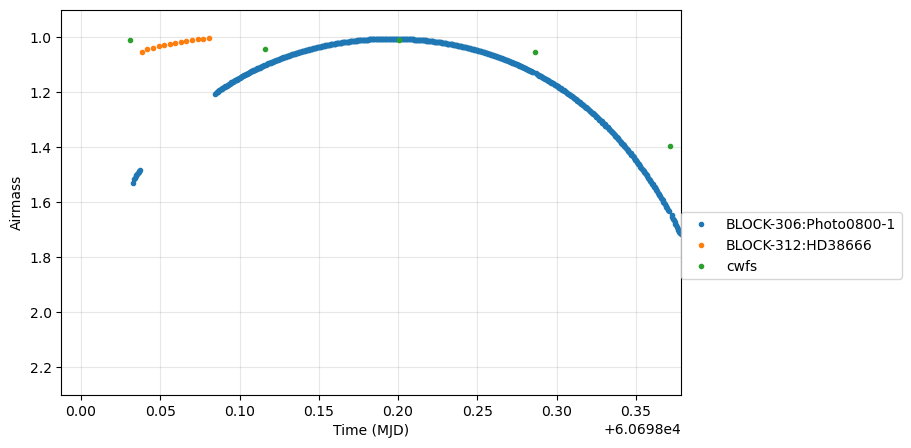

In [8]:
plt.figure(figsize=(8, 5))
for scheduler_note in np.unique(observations['scheduler_note']):
    match = np.where(observations['scheduler_note'] == scheduler_note)
    plt.plot(observations[match]['mjd'], observations[match]['airmass'], marker='.', linestyle='', label=scheduler_note)
plt.xlim(sunset.mjd, sunrise.mjd)
plt.ylim(2.3, 0.9)
plt.legend(loc=(1.0, 0.3))
plt.xlabel("Time (MJD)")
plt.ylabel("Airmass")
plt.grid(alpha=0.3)

In [9]:
# What did dither look like with tiles? 
# seems small, within FOV. 
# size of latiss? 
0.2 * 2042 / 60 / 60 # deg

from lsst.ts.fbs.utils import get_auxtel_tiles
tiles = get_auxtel_tiles()
print(len(tiles))
print(tiles)
#plt.plot(tiles['RA'], tiles['Dec'], 'k.')
skycoord = SkyCoord(ra=tiles['RA'], dec=tiles['Dec'], unit=(u.hourangle, u.deg))
print(skycoord.ra.mean().hour, skycoord.dec.mean())
print('ra range', (skycoord.ra.max() - skycoord.ra.min()).deg * np.cos(skycoord.dec.mean().rad))
print('dec range', (skycoord.dec.max() - skycoord.dec.min()).deg)
print("max dither might be",  7 / 2 / 60)

16
  Survey        Name           RA         Dec     
--------- --------------- ----------- ------------
BLOCK-306 Photo0800-1_001 08:09:44.61 -36:12:34.00
BLOCK-306 Photo0800-1_002 08:09:49.01 -36:12:34.00
BLOCK-306 Photo0800-1_003 08:09:53.40 -36:12:34.00
BLOCK-306 Photo0800-1_004 08:09:57.80 -36:12:34.00
BLOCK-306 Photo0800-1_005 08:10:02.20 -36:12:34.00
BLOCK-306 Photo0800-1_006 08:10:06.60 -36:12:34.00
BLOCK-306 Photo0800-1_007 08:10:10.99 -36:12:34.00
BLOCK-306 Photo0800-1_008 08:10:15.39 -36:12:34.00
BLOCK-306 Photo0800-1_009 08:09:44.61 -36:10:12.00
BLOCK-306 Photo0800-1_010 08:09:49.01 -36:10:12.00
BLOCK-306 Photo0800-1_011 08:09:53.40 -36:10:12.00
BLOCK-306 Photo0800-1_012 08:09:57.80 -36:10:12.00
BLOCK-306 Photo0800-1_013 08:10:02.20 -36:10:12.00
BLOCK-306 Photo0800-1_014 08:10:06.60 -36:10:12.00
BLOCK-306 Photo0800-1_015 08:10:10.99 -36:10:12.00
BLOCK-306 Photo0800-1_016 08:10:15.39 -36:10:12.00
8.166666666666668 -36d11m23s
ra range 0.10350624561756366
dec range 0.039444444

In [ ]:
schema_converter = SchemaConverter()
    
visits_examples = []
for observations in obs_examples:
    visits = schema_converter.obs2opsim(observations)
    # add start_date
    visits["start_date"] = pd.to_datetime(visits["observationStartMJD"] + 2400000.5, 
                                          origin="julian", unit="D", utc=True)
    visits = visits.apply(demangle_note, axis=1)
    visits_examples.append(visits)

In [ ]:
visits = visits_examples[0]
visits.head()

In [ ]:
visits = visits_examples[1]
if len(visits):
    fig = bokeh.plotting.figure(frame_width=800)
    fig = schedview.plot.nightly.plot_alt_vs_time(
        visits=visits, almanac_events=night_events,
        figure=fig
    )
    bokeh.io.show(fig)
else:
    print("No visits")

In [ ]:
if len(visits):
    fig = schedview.plot.nightly.plot_polar_alt_az(visits=visits, legend=True)
    bokeh.io.show(fig)
else:
    print("No visits")

In [ ]:
def summarize_options(visits_examples):
    # Find what kinds of observations were present in all simulations
    all_notes = []
    for visits in visits_examples:
        all_notes.extend(list(visits.note.unique()))
    all_notes = set(all_notes)
    #print('Survey notes across all examples', all_notes)
    summary = {}
    summary['Observing'] = {}
    summary['Observing']['Start'] = []
    summary['Observing']["End"] = []
    summary['Observing']['Nobs'] = []
    for visits in visits_examples:
        summary['Observing']['Start'] += [visits.start_date.min()]
        summary['Observing']['End'] += [visits.start_date.max()]
        summary['Observing']['Nobs'] += [len(visits)]
    for note in all_notes:
        summary[note] = {}
    for note in all_notes:
        summary[note]["Start"] = []
        summary[note]["End"] = []
        summary[note]["Nobs"] = []
        summary[note]["Airmass Min"] = []
        summary[note]["Airmass Max"] = []
        for visits in visits_examples:
            subset = visits.query('note == @note')            
            summary[note]["Start"] += [subset.start_date.min()]
            summary[note]["End"] += [subset.start_date.max()]
            summary[note]["Nobs"] += [len(subset)]
            summary[note]["Airmass Min"] += [subset.airmass.min()]
            summary[note]["Airmass Max"] += [subset.airmass.max()]
    return pd.DataFrame(summary), all_notes

summary, notes = summarize_options(visits_examples)
summary

In [ ]:
summary.loc["Start", "Observing"][0], start_times[0].isot

In [ ]:
for time in summary.loc["Start", "Observing"]:
    plt.axvline(time, color='k', linestyle=':')
colors = cc.glasbey
for i, c in enumerate(notes):
    x1 = summary.loc['Start', c]
    x2 = summary.loc['End', c]
    y = summary.loc['Nobs', c]
    for xi, xo, yi in zip(x1, x2, y):
        plt.plot([xi, xo], [yi, yi], 
                 linestyle='-', marker='o', color=colors[i])
    plt.plot(summary.loc['Start', c][0], 
             summary.loc['Nobs', c][0], 
             linestyle='', marker='o', color=colors[i], label=c)
plt.xticks(rotation=90)
plt.xlabel("Start Time for note")
plt.ylabel("Number of observations per target")
plt.legend(loc=(1.0, 0.3))
plt.grid(True, alpha=0.3)